# TASK1

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once you've collected your data and saved it into a local .csv file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `Scrapy` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [49]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [50]:

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 354

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

2023-04-26 17:58:33 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.airlinequality.com:443


Scraping page 1


2023-04-26 17:58:35 [urllib3.connectionpool] DEBUG: https://www.airlinequality.com:443 "GET /airline-reviews/british-airways/page/1/?sortby=post_date%3ADesc&pagesize=354 HTTP/1.1" 200 None
2023-04-26 17:58:37 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.airlinequality.com:443


   ---> 354 total reviews
Scraping page 2


2023-04-26 17:58:38 [urllib3.connectionpool] DEBUG: https://www.airlinequality.com:443 "GET /airline-reviews/british-airways/page/2/?sortby=post_date%3ADesc&pagesize=354 HTTP/1.1" 200 None
2023-04-26 17:58:40 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.airlinequality.com:443


   ---> 708 total reviews
Scraping page 3


2023-04-26 17:58:42 [urllib3.connectionpool] DEBUG: https://www.airlinequality.com:443 "GET /airline-reviews/british-airways/page/3/?sortby=post_date%3ADesc&pagesize=354 HTTP/1.1" 200 None
2023-04-26 17:58:44 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.airlinequality.com:443


   ---> 1062 total reviews
Scraping page 4


2023-04-26 17:58:49 [urllib3.connectionpool] DEBUG: https://www.airlinequality.com:443 "GET /airline-reviews/british-airways/page/4/?sortby=post_date%3ADesc&pagesize=354 HTTP/1.1" 200 None
2023-04-26 17:58:50 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.airlinequality.com:443


   ---> 1416 total reviews
Scraping page 5


2023-04-26 17:58:52 [urllib3.connectionpool] DEBUG: https://www.airlinequality.com:443 "GET /airline-reviews/british-airways/page/5/?sortby=post_date%3ADesc&pagesize=354 HTTP/1.1" 200 None
2023-04-26 17:58:54 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.airlinequality.com:443


   ---> 1770 total reviews
Scraping page 6


2023-04-26 17:58:56 [urllib3.connectionpool] DEBUG: https://www.airlinequality.com:443 "GET /airline-reviews/british-airways/page/6/?sortby=post_date%3ADesc&pagesize=354 HTTP/1.1" 200 None
2023-04-26 17:58:58 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.airlinequality.com:443


   ---> 2124 total reviews
Scraping page 7


2023-04-26 17:59:00 [urllib3.connectionpool] DEBUG: https://www.airlinequality.com:443 "GET /airline-reviews/british-airways/page/7/?sortby=post_date%3ADesc&pagesize=354 HTTP/1.1" 200 None
2023-04-26 17:59:01 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.airlinequality.com:443


   ---> 2478 total reviews
Scraping page 8


2023-04-26 17:59:03 [urllib3.connectionpool] DEBUG: https://www.airlinequality.com:443 "GET /airline-reviews/british-airways/page/8/?sortby=post_date%3ADesc&pagesize=354 HTTP/1.1" 200 None
2023-04-26 17:59:05 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.airlinequality.com:443


   ---> 2832 total reviews
Scraping page 9


2023-04-26 17:59:07 [urllib3.connectionpool] DEBUG: https://www.airlinequality.com:443 "GET /airline-reviews/british-airways/page/9/?sortby=post_date%3ADesc&pagesize=354 HTTP/1.1" 200 None
2023-04-26 17:59:08 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.airlinequality.com:443


   ---> 3186 total reviews
Scraping page 10


2023-04-26 17:59:10 [urllib3.connectionpool] DEBUG: https://www.airlinequality.com:443 "GET /airline-reviews/british-airways/page/10/?sortby=post_date%3ADesc&pagesize=354 HTTP/1.1" 200 None


   ---> 3536 total reviews


In [51]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | I travelled with British Airway...
1,Not Verified | Food was lousy. Who ever is pl...
2,✅ Trip Verified | Had the worst experience. Th...
3,✅ Trip Verified | The ground staff were not h...
4,✅ Trip Verified | Second time BA Premium Econ...


In [52]:
df.shape

(3536, 1)

In [53]:
df.dropna(inplace=True)

In [54]:
df.shape

(3536, 1)

In [55]:
df.tail()

,reviews
3531,HKG-LHR in New Club World on Boeing 777-300 - ...
3532,LHR to HAM. Purser addresses all club passenge...
3533,My son who had worked for British Airways urge...
3534,London City-New York JFK via Shannon on A318 b...
3535,SIN-LHR BA12 B747-436 First Class. Old aircraf...


In [61]:
df.reviews= [review.split('|')[1] if '|' in review else review for review in df.reviews]


In [65]:
df

,reviews
0,I travelled with British Airways from Sweden ...
1,Food was lousy. Who ever is planning the Asi...
2,Had the worst experience. The flight from Lon...
3,The ground staff were not helpful. Felt like...
4,Second time BA Premium Economy in a newer ai...
...,...
3531,HKG-LHR in New Club World on Boeing 777-300 - ...
3532,LHR to HAM. Purser addresses all club passenge...
3533,My son who had worked for British Airways urge...
3534,London City-New York JFK via Shannon on A318 b...


**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# Step 1: Cleaning the text

In [66]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,I travelled with British Airways from Sweden ...,I travelled with British Airways from Sweden ...
1,Food was lousy. Who ever is planning the Asi...,Food was lousy Who ever is planning the Asian...
2,Had the worst experience. The flight from Lon...,Had the worst experience The flight from Lond...
3,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...
4,Second time BA Premium Economy in a newer ai...,Second time BA Premium Economy in a newer air...


# Step 2: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

# Step 3: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

# Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language. 

# Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.


```
NLTK is a leading platform for building Python programs to work with human language data. 

```

```
It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries
```


In [67]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

2023-04-26 18:19:05 [py.warnings] WARNING: /home/veglo-gabin/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

[nltk_data] Downloading package punkt to /home/veglo-
[nltk_data]     gabin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/veglo-
[nltk_data]     gabin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/veglo-
[nltk_data]     gabin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [68]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /home/veglo-
[nltk_data]     gabin/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/veglo-gabin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,I travelled with British Airways from Sweden ...,I travelled with British Airways from Sweden ...,"[(travelled, v), (British, a), (Airways, n), (..."
1,Food was lousy. Who ever is planning the Asi...,Food was lousy Who ever is planning the Asian...,"[(Food, n), (lousy, n), (ever, r), (planning, ..."
2,Had the worst experience. The flight from Lon...,Had the worst experience The flight from Lond...,"[(worst, a), (experience, n), (flight, n), (Lo..."
3,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...,"[(ground, n), (staff, n), (helpful, a), (Felt,..."
4,Second time BA Premium Economy in a newer ai...,Second time BA Premium Economy in a newer air...,"[(Second, a), (time, n), (BA, n), (Premium, n)..."


In [69]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,I travelled with British Airways from Sweden ...,I travelled with British Airways from Sweden ...,"[(travelled, v), (British, a), (Airways, n), (...",travel British Airways Sweden Los Angeles vi...
1,Food was lousy. Who ever is planning the Asi...,Food was lousy Who ever is planning the Asian...,"[(Food, n), (lousy, n), (ever, r), (planning, ...",Food lousy ever plan Asian Hindu Vegetarian ...
2,Had the worst experience. The flight from Lon...,Had the worst experience The flight from Lond...,"[(worst, a), (experience, n), (flight, n), (Lo...",bad experience flight London Toronto get del...
3,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...,"[(ground, n), (staff, n), (helpful, a), (Felt,...",ground staff helpful Felt like want rush us ...
4,Second time BA Premium Economy in a newer ai...,Second time BA Premium Economy in a newer air...,"[(Second, a), (time, n), (BA, n), (Premium, n)...",Second time BA Premium Economy newer aircraf...


In [70]:
df[['reviews','Lemma']]

,reviews,Lemma
0,I travelled with British Airways from Sweden ...,travel British Airways Sweden Los Angeles vi...
1,Food was lousy. Who ever is planning the Asi...,Food lousy ever plan Asian Hindu Vegetarian ...
2,Had the worst experience. The flight from Lon...,bad experience flight London Toronto get del...
3,The ground staff were not helpful. Felt like...,ground staff helpful Felt like want rush us ...
4,Second time BA Premium Economy in a newer ai...,Second time BA Premium Economy newer aircraf...
...,...,...
3531,HKG-LHR in New Club World on Boeing 777-300 - ...,HKG LHR New Club World Boeing Bought ticket ...
3532,LHR to HAM. Purser addresses all club passenge...,LHR HAM Purser address club passenger name b...
3533,My son who had worked for British Airways urge...,son work British Airways urge fly British Ai...
3534,London City-New York JFK via Shannon on A318 b...,London City New York JFK via Shannon really ...


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.


In [71]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 340.0 kB/s eta 0:00:001m354.5 kB/s eta 0:00:01

[notice] A new release of pip is available: 23.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


In [72]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I travelled with British Airways from Sweden ...,I travelled with British Airways from Sweden ...,"[(travelled, v), (British, a), (Airways, n), (...",travel British Airways Sweden Los Angeles vi...,-0.7902,Negative
1,Food was lousy. Who ever is planning the Asi...,Food was lousy Who ever is planning the Asian...,"[(Food, n), (lousy, n), (ever, r), (planning, ...",Food lousy ever plan Asian Hindu Vegetarian ...,-0.5574,Negative
2,Had the worst experience. The flight from Lon...,Had the worst experience The flight from Lond...,"[(worst, a), (experience, n), (flight, n), (Lo...",bad experience flight London Toronto get del...,0.1546,Neutral
3,The ground staff were not helpful. Felt like...,The ground staff were not helpful Felt like a...,"[(ground, n), (staff, n), (helpful, a), (Felt,...",ground staff helpful Felt like want rush us ...,0.6124,Positive
4,Second time BA Premium Economy in a newer ai...,Second time BA Premium Economy in a newer air...,"[(Second, a), (time, n), (BA, n), (Premium, n)...",Second time BA Premium Economy newer aircraf...,0.9704,Positive


In [73]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    2093
Negative    1072
Neutral      371
Name: Analysis, dtype: int64

# Visual Representation

2023-04-26 18:31:00 [matplotlib.pyplot] DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.


([<matplotlib.patches.Wedge at 0x7f2dc2aaf7c0>,
 [Text(-0.31322899781321567, 1.0544608076779947, 'Positive'),
  Text(-0.04494330064302349, -1.0990814800219821, 'Negative'),
  Text(1.2773240843197118, -0.43697046080577395, 'Neutral')],
 [Text(-0.17085218062539034, 0.5751604405516334, '59.2%'),
  Text(-0.024514527623467352, -0.5994989891028993, '30.3%'),
  Text(0.8042410901272259, -0.275129549396228, '10.5%')])

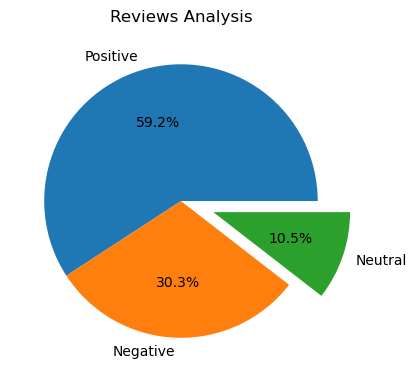

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

# Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

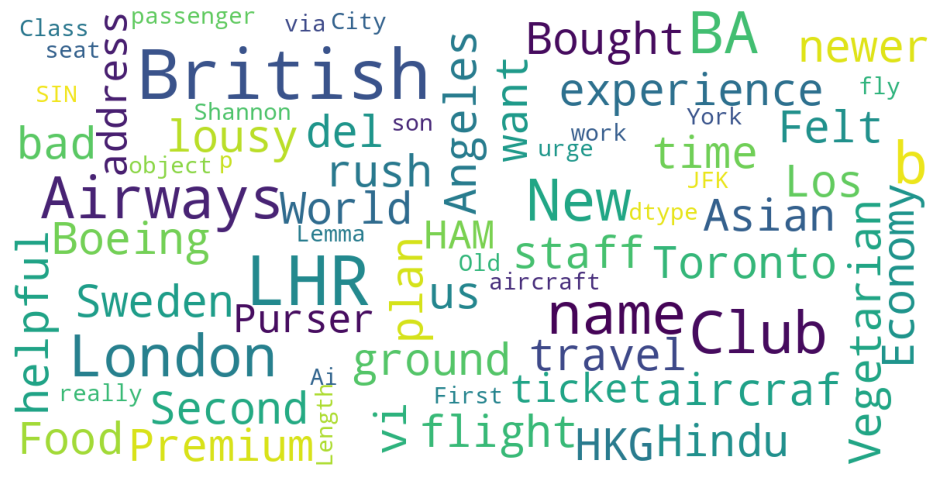

In [80]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

# CHECK THIS RESPONSE BY USE FreqDist FROM NLTK TO COUNT THE FREQUENCE OF EACH WORD

In [85]:

#Importing data
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('webtext')
# concatenate all the values in the 'text' column
text_concatenated = ' '.join(df['Lemma'].tolist())

# get words from the concatenated text
# tokenize the text
tokens = word_tokenize(text_concatenated)
# create a frequency distribution object
freq_dist = nltk.FreqDist(tokens)
freq_dist

[nltk_data] Downloading package webtext to /home/veglo-
[nltk_data]     gabin/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


FreqDist({'flight': 7080, 'BA': 4729, 'seat': 4284, 'service': 2636, 'good': 2379, 'time': 2326, 'London': 2160, 'get': 2084, 'British': 2066, 'Airways': 2012, ...})

# Consider words with length greater than 1000 and plot

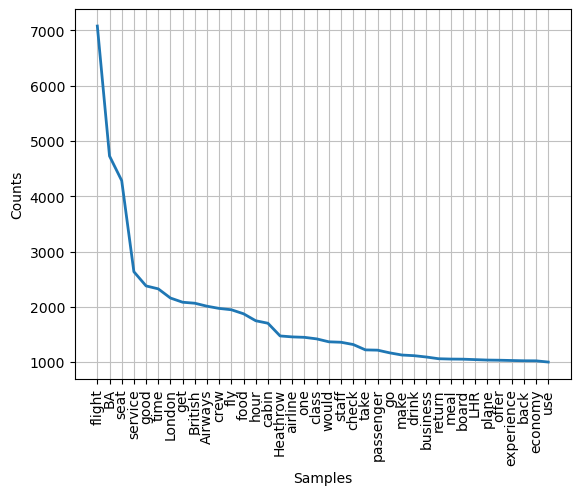

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [88]:
large_words = dict([(k,v) for k,v in freq_dist.items() if v>1000])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(50,cumulative=False)
